## Visualise  
Deze code wordt gebruikt om bepaalde layers te visualiseren om zo een beter idee te krijgen over de werking van het model.

### Bronnen  
- https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [1]:
import os
import numpy as np
import cv2

from matplotlib import pyplot
from numpy import expand_dims

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model

In [2]:
model = load_model("modeltestset")
model.summary()
plot_model(model, to_file='model.png')

2022-03-10 21:10:18.620530: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      11648     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      50208     
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                        

In [3]:
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (11, 11, 3, 32)
conv2d_1 (7, 7, 32, 32)
conv2d_2 (5, 5, 32, 32)
conv2d_3 (3, 3, 32, 64)
conv2d_4 (3, 3, 64, 128)
conv2d_5 (3, 3, 128, 128)


#### Visualiseren van de convolutional filters

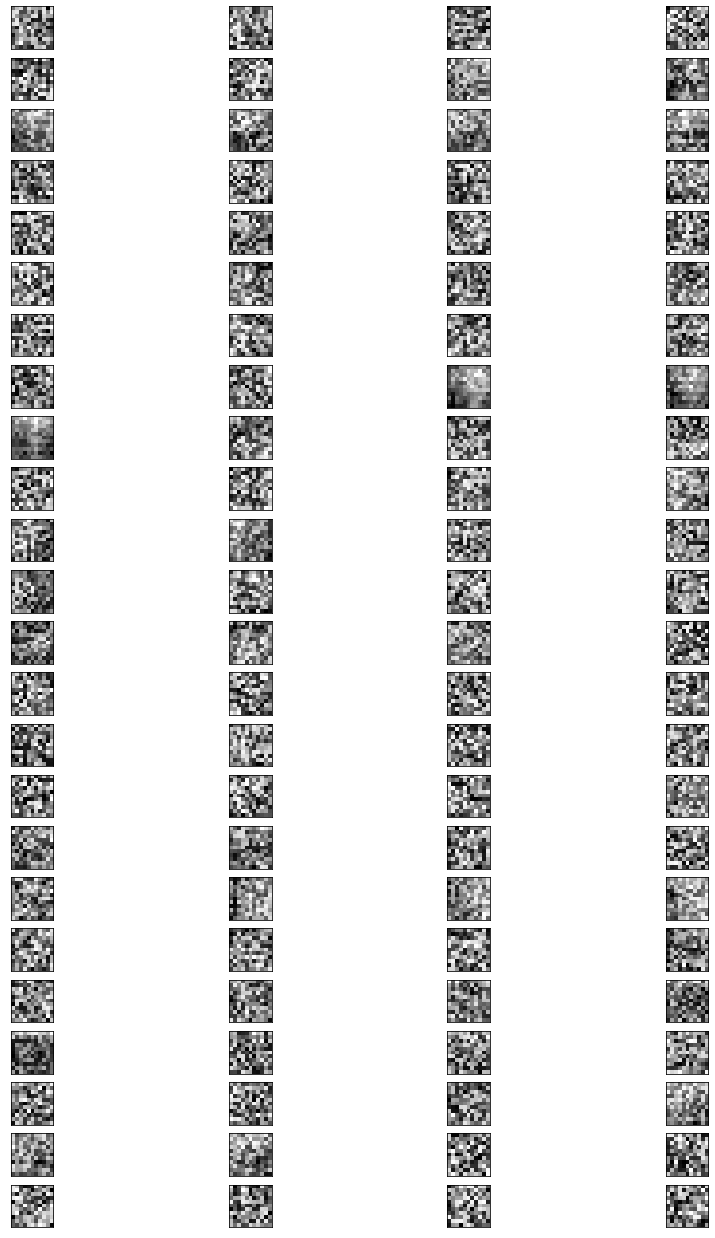

In [4]:
# mogelijke concolutional layers: 
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 32, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        pyplot.rcParams["figure.figsize"] = (15,30)
        ax = pyplot.subplot(n_filters, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

#### Visualiseren feature maps


-----------------------------------------------------------------


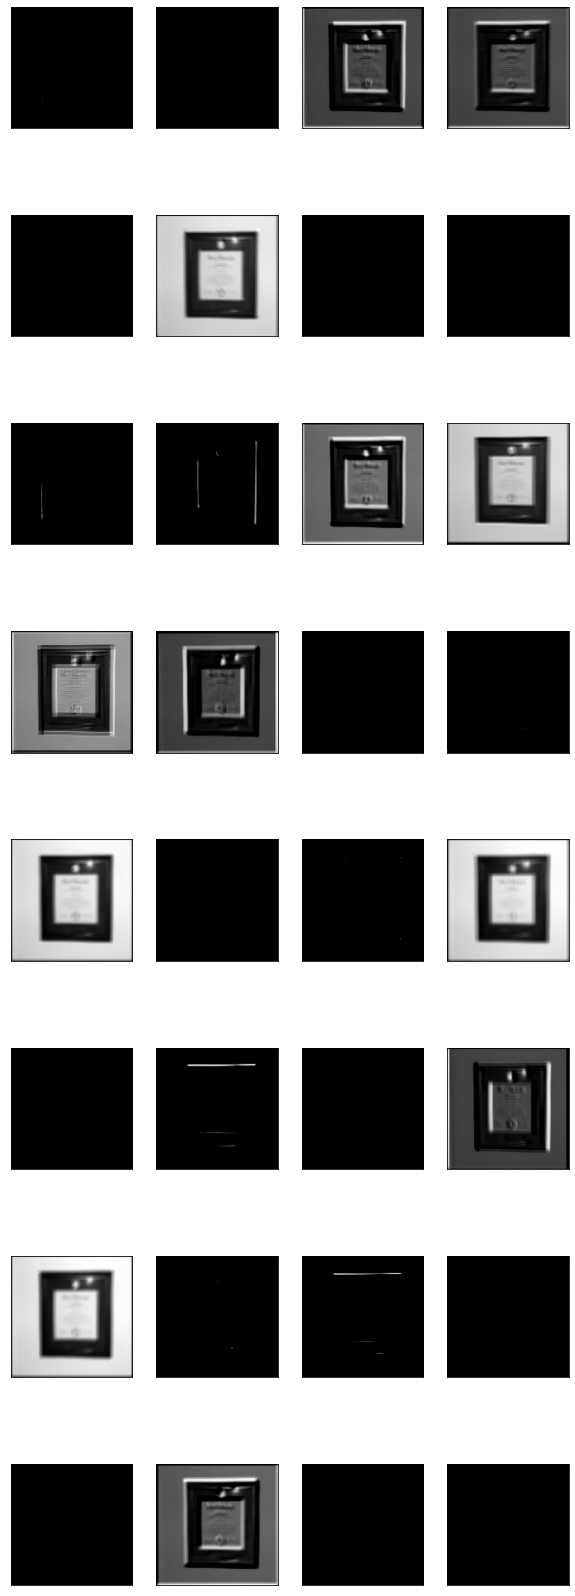

-----------------------------------------------------------------


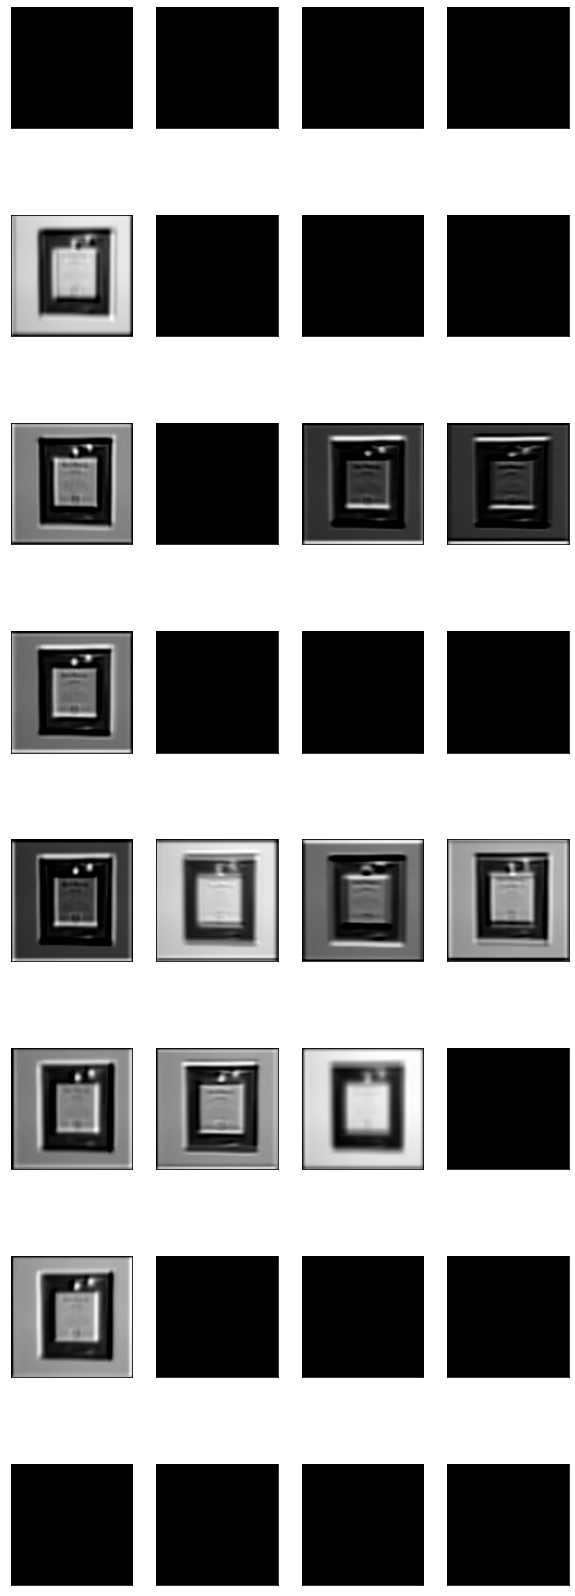

-----------------------------------------------------------------


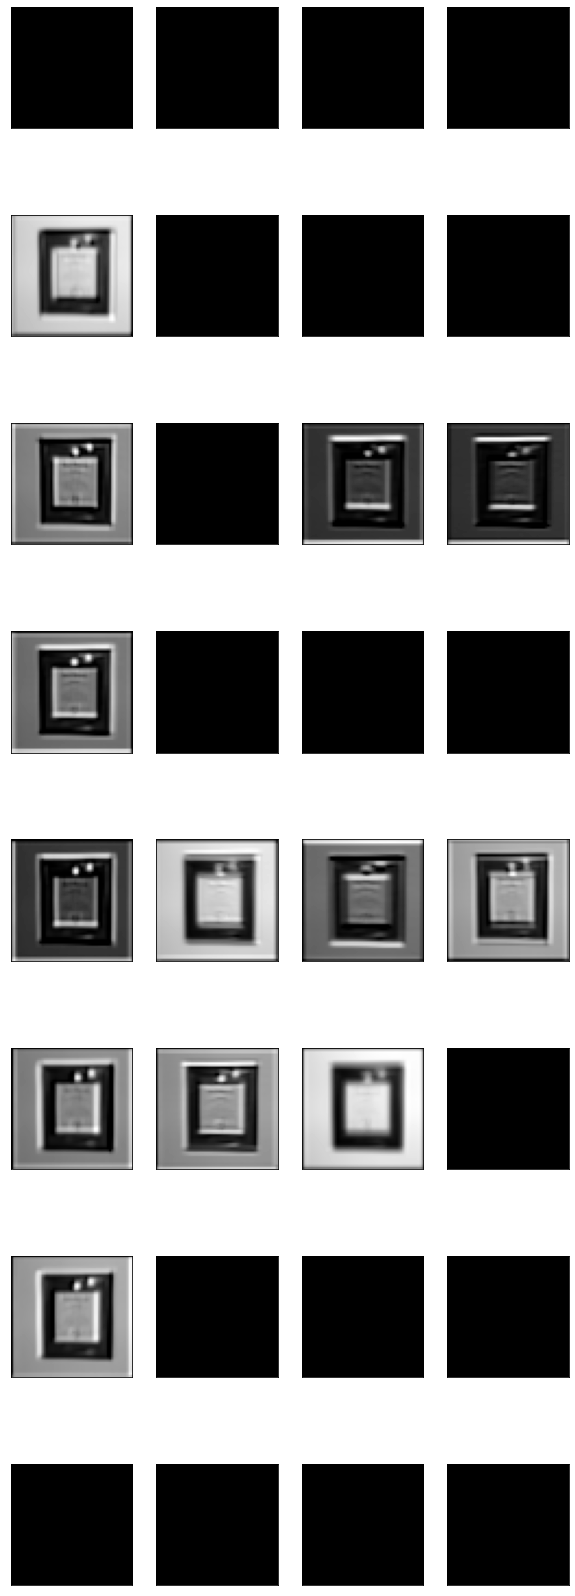

-----------------------------------------------------------------


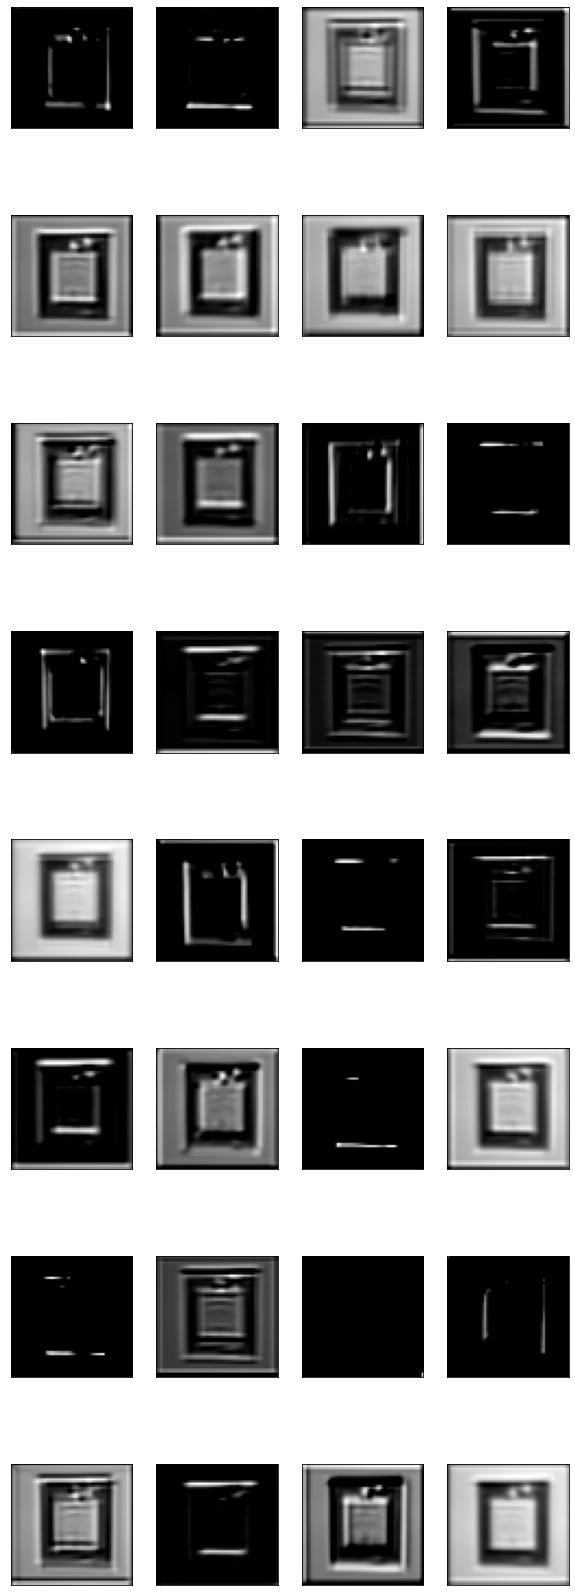

-----------------------------------------------------------------


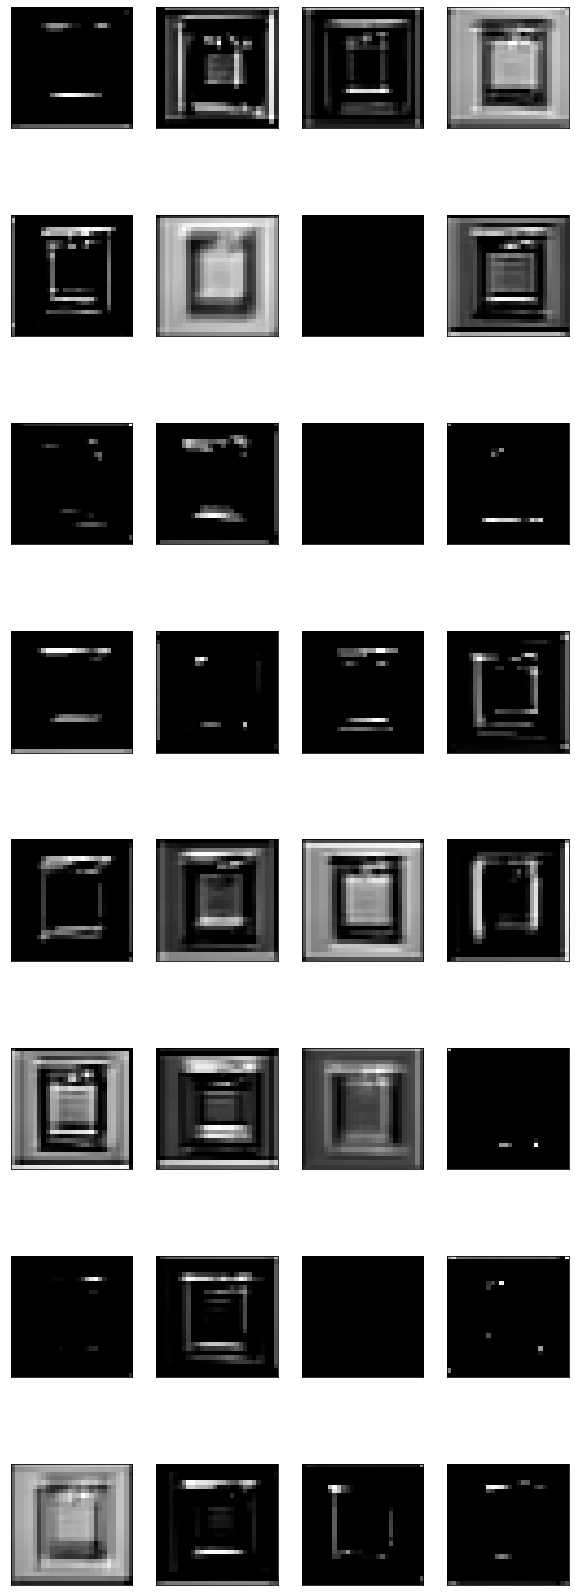

In [5]:
IMAGE_PATH = 'Trimmeddata/test/images/0c585389c6d3db2e_jpg.rf.bad5bc6dcaa254aa8564f524fabf3e02.jpg'
# redefine model to output right after the first hidden layer
ixs = [0,2,4,6,8]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img(IMAGE_PATH, target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
l = 8
h = 4
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    print("-"*65)
    for _ in range(l):
        for _ in range(h):
            # specify subplot and turn of axis
            pyplot.rcParams["figure.figsize"] = (10,30)
            ax = pyplot.subplot(l, h, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0,:, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    pyplot.show()